In [1]:
# Import libraries
import pandas as pd 
import matplotlib.pyplot as plt 
import matplotlib.font_manager as fm
import numpy as np 
import seaborn as sns 
from sklearn.linear_model import LinearRegression as lrs 

In [2]:
# Import duckdb to use SQL query
import duckdb as dkb

In [3]:
# Load the data csv file
data = pd.read_csv(r"survey_results_public.csv")
data.head(5)

C:\Users\huysi\AppData\Local\Temp\ipykernel_28096\691958225.py:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(r"survey_results_public.csv")


,ResponseId,MainBranch,Age,EdLevel,Employment,EmploymentAddl,WorkExp,LearnCodeChoose,LearnCode,LearnCodeAI,...,AIAgentOrchestration,AIAgentOrchWrite,AIAgentObserveSecure,AIAgentObsWrite,AIAgentExternal,AIAgentExtWrite,AIHuman,AIOpen,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,25-34 years old,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Employed,"Caring for dependents (children, elderly, etc.)",8.0,"Yes, I am not new to coding but am learning ne...",Online Courses or Certification (includes all ...,"Yes, I learned how to use AI-enabled tools for...",...,Vertex AI,NaN,NaN,NaN,ChatGPT,NaN,When I don’t trust AI’s answers,"Troubleshooting, profiling, debugging",61256.0,10.0
1,2,I am a developer by profession,25-34 years old,"Associate degree (A.A., A.S., etc.)",Employed,NaN,2.0,"Yes, I am not new to coding but am learning ne...",Online Courses or Certification (includes all ...,"Yes, I learned how to use AI-enabled tools for...",...,NaN,NaN,NaN,NaN,NaN,NaN,When I don’t trust AI’s answers;When I want to...,All skills. AI is a flop.,104413.0,9.0
2,3,I am a developer by profession,35-44 years old,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Independent contractor, freelancer, or self-em...",None of the above,10.0,"Yes, I am not new to coding but am learning ne...",Online Courses or Certification (includes all ...,"Yes, I learned how to use AI-enabled tools for...",...,NaN,NaN,NaN,NaN,ChatGPT;Claude Code;GitHub Copilot;Google Gemini,NaN,When I don’t trust AI’s answers;When I want to...,"Understand how things actually work, problem s...",53061.0,8.0
3,4,I am a developer by profession,35-44 years old,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed,None of the above,4.0,"Yes, I am not new to coding but am learning ne...","Other online resources (e.g. standard search, ...","Yes, I learned how to use AI-enabled tools for...",...,NaN,NaN,NaN,NaN,ChatGPT;Claude Code,NaN,When I don’t trust AI’s answers;When I want to...,NaN,36197.0,6.0
4,5,I am a developer by profession,35-44 years old,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Independent contractor, freelancer, or self-em...","Caring for dependents (children, elderly, etc.)",21.0,"No, I am not new to coding and did not learn n...",NaN,"Yes, I learned how to use AI-enabled tools for...",...,NaN,NaN,NaN,NaN,NaN,NaN,When I don’t trust AI’s answers,"critical thinking, the skill to define the tas...",60000.0,7.0


In [ ]:
# Query Number of Responses by Age with Duckdb
query1 = """
    select 
        REPLACE(REPLACE(Age, ' years old', ''), '65 years or older', ' >=65') AS Age, 
        count(ResponseID) as 'Number of Responses'
    from data
    where Age != 'Prefer not to say'
    group by Age
    order by Age desc
        """

con = dkb.connect()
result1 = con.sql(query1).df()
result1

,Age,Number of Responses
0,55-64,2626
1,45-54,6265
2,35-44,13232
3,25-34,16485
4,18-24,9195
5,>=65,942


In [5]:
# Add labels to attributes
labels = result1['Age']
size = result1['Number of Responses']

In [6]:
text_properties = {
    'fontsize': 16,      # Increase font size
    'fontweight': 'semi-bold' # Set font weight
}

# Customize wedge (slice) properties (for borders)
wedge_properties = {
    'linewidth': 0.4,        # Set border width
    'edgecolor': 'black' # Set border color
}

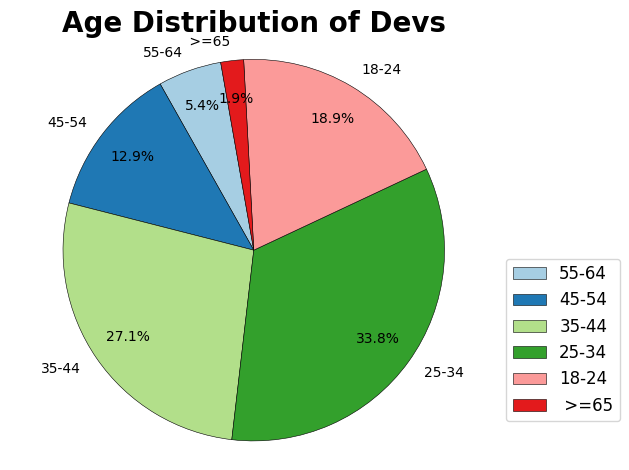

In [7]:
plt.Figure(figsize=(10,8))
plt.pie(size, labels=labels, 
        autopct='%1.1f%%',
        pctdistance=0.8, 
        startangle=100, 
        colors=plt.cm.Paired.colors,
        wedgeprops=wedge_properties)
plt.axis('equal')
plt.title('Age Distribution of Devs', fontsize = 20, fontweight = 'bold')
plt.legend(loc ='best',
           bbox_to_anchor=(1, 0.5), 
           fontsize='large')
plt.tight_layout()
plt.show()

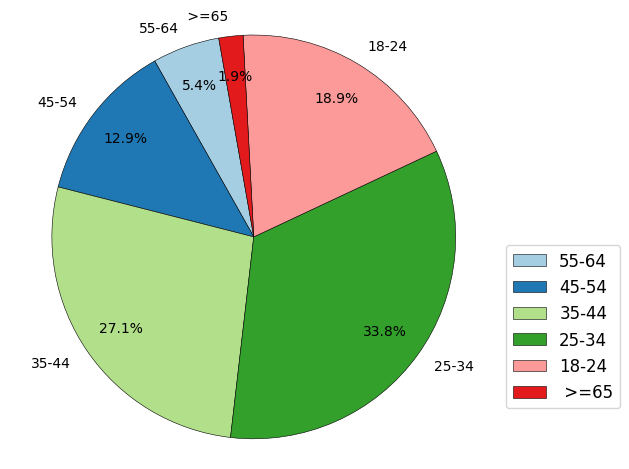

In [8]:
plt.Figure(figsize=(10,8))
plt.pie(size, labels=labels, 
        autopct='%1.1f%%',
        pctdistance=0.8, 
        startangle=100, 
        colors=plt.cm.Paired.colors,
        wedgeprops=wedge_properties)
plt.axis('equal')
plt.legend(loc ='best',
           bbox_to_anchor=(1, 0.5), 
           fontsize='large')
plt.tight_layout()
plt.show()

In [9]:
query2 = """
    select REPLACE(REPLACE(Age, ' years old', ''), '65 years or older', ' Over 65') AS Age, round(avg(WorkExp),2) as 'Avg. Years of Exp'
    from data
    where Age != 'Prefer not to say'
    and workexp < 65
    group by age
    order by avg(workexp)
"""
result2 = con.sql(query2).df()
display(result2)

,Age,Avg. Years of Exp
0,18-24,2.74
1,25-34,6.86
2,35-44,14.65
3,45-54,23.80
4,55-64,32.78
5,Over 65,40.97


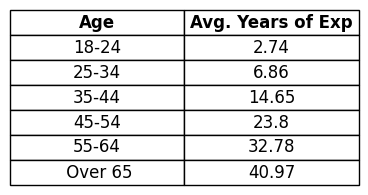

In [10]:
fig, ax = plt.subplots(figsize=(3,1))
ax.axis("off")

table = ax.table(cellText =result2.values, colLabels=result2.columns, cellLoc="center", loc="center")
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.5, 1.5)  # Adjust cell size

for (row, col), cell in table.get_celld().items():
    if row == 0:  # Header row
        cell.get_text().set_fontweight('bold')

plt.show()

In [11]:
demoq = """
    select edlevel, count(edlevel)
    from data
    group by edlevel
"""
re_demo = con.sql(demoq).df()
re_demo

,EdLevel,count(edlevel)
0,Some college/university study without earning ...,6175
1,Primary/elementary school,582
2,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",12575
3,"Associate degree (A.A., A.S., etc.)",1560
4,"Professional degree (JD, MD, Ph.D, Ed.D, etc.)",2620
5,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",20247
6,"Secondary school (e.g. American high school, G...",3627
7,Other (please specify):,701
8,None,0


In [12]:
con.execute("""DROP TABLE IF EXISTS data_clean;""")
con.execute("""
    CREATE TABLE data_clean AS
SELECT
    CASE
        WHEN LOWER(TRIM(edlevel)) LIKE '%associate%' THEN 'Associate''s degree'
        WHEN LOWER(TRIM(edlevel)) LIKE '%professional%' THEN 'Professional''s degree'
        WHEN LOWER(TRIM(edlevel)) LIKE '%master%' THEN 'Master''s degree'
        WHEN LOWER(TRIM(edlevel)) LIKE '%bachelor%' THEN 'Bachelor''s degree'
        WHEN LOWER(TRIM(edlevel)) LIKE '%secondary%' THEN 'Secondary school'
        WHEN LOWER(TRIM(edlevel)) LIKE '%other%' THEN 'Other'
        WHEN LOWER(TRIM(edlevel)) LIKE '%some%' THEN 'Some college without earning a degree'
        ELSE TRIM(edlevel)
    END AS edlevel,
    responseid
FROM data
""")
result3 = con.sql("""
    SELECT edlevel as 'Education', 
                  COUNT(responseid) * 100.0 / (SELECT COUNT(responseid) FROM data_clean WHERE edlevel != 'NA') AS 'Percentage of Responses'  
    FROM data_clean
    WHERE edlevel != 'NA'
    GROUP BY edlevel
    ORDER BY edlevel ASC
""").df()

res_sorted = result3.sort_values(by='Percentage of Responses', ascending = True)
res_sorted

,Education,Percentage of Responses
4,Primary/elementary school,1.210306
3,Other,1.457774
0,Associate's degree,3.244120
5,Professional's degree,5.448458
6,Secondary school,7.542579
7,Some college without earning a degree,12.841308
2,Master's degree,26.150519
1,Bachelor's degree,42.104935


In [13]:
x = res_sorted['Percentage of Responses']
y = res_sorted['Education']

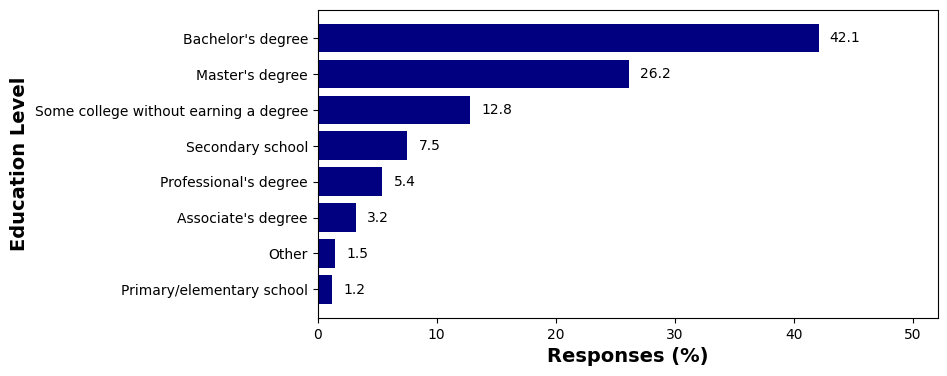

In [14]:
fig, ax = plt.subplots(figsize=(8, 4))
bars = plt.barh(y, x, color = 'navy')

ax.bar_label(bars, padding = 8, fmt='%.1f')

ax.set_xlabel('Responses (%)', fontsize = 14, fontweight = 'bold')
ax.set_ylabel('Education Level', fontsize = 14, fontweight = 'bold')

ax.set_xlim(right=res_sorted['Percentage of Responses'].max() + 10)

plt.show()

In [15]:
# Query and clean MainBranch

In [16]:
con.execute("""DROP TABLE IF EXISTS data_clean2;""")
con.execute("""
create table data_clean2 as 
    SELECT
        CASE
            WHEN LOWER(TRIM(MainBranch)) LIKE '%i am a developer by profession%' 
                                        THEN 'Professional Developer'
            WHEN LOWER(TRIM(Mainbranch)) LIKE '%i am learning to code%'
                                        THEN 'Learning to code'
            WHEN LOWER(TRIM(MainBranch)) LIKE '%i am not primarily a developer,%'
                                        THEN 'Part of work/study'
            WHEN LOWER(TRIM(MainBranch)) LIKE '%i code primarily as a hobby%'
                                        THEN 'Coding as a hobby'
            WHEN LOWER(TRIM(MainBranch)) LIKE '%i used to be a developer by profession%'
                                        THEN 'Used to be a developer'
            WHEN LOWER(TRIM(MainBranch)) LIKE '%i work with developers or%'
                                        THEN 'I work with developers'
            ELSE TRIM(MainBranch)
        END AS MainBranch,
        ResponseID
    FROM data 
    WHERE edlevel != 'NA'
    AND devtype != 'NA'
""")


query_dev_type = """
    SELECT Mainbranch as 'Main Branch',
           COUNT(responseid) * 100.0 / (SELECT COUNT(responseid) FROM data_clean2 WHERE MainBranch != 'NA') AS 'Responses (%)'  
    FROM data_clean2
    WHERE MainBranch != 'NA'
    GROUP BY MainBranch
    ORDER BY MainBranch ASC 
"""

result_branch = con.sql(query_dev_type).df()
sorted_branch = result_branch.sort_values(by='Responses (%)', ascending=True)
sorted_branch

,Main Branch,Responses (%)
1,I work with developers,1.834061
5,Used to be a developer,2.629281
0,Coding as a hobby,3.677316
2,Learning to code,4.672489
3,Part of work/study,9.977017
4,Professional Developer,77.209837


In [17]:
x1 = sorted_branch['Main Branch']
y1 = sorted_branch['Responses (%)']

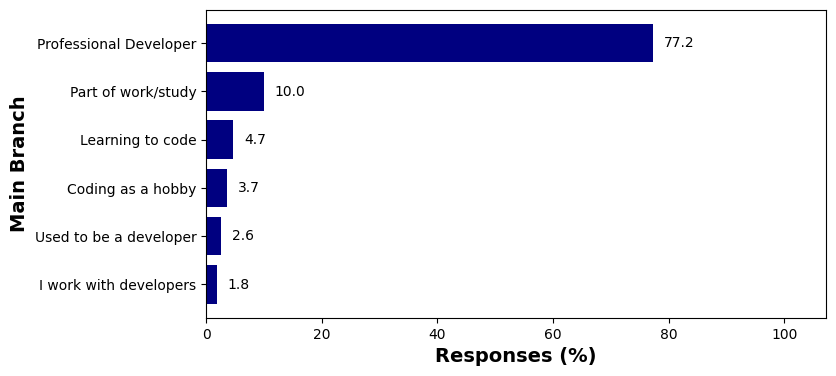

In [18]:
fig1, ax1 = plt.subplots(figsize=(8,4))

bars1 = plt.barh(x1, y1, color = 'navy')

ax1.bar_label(bars1, padding = 8, fmt='%.1f')

ax1.set_xlabel('Responses (%)', fontsize = 14, fontweight = 'bold')
ax1.set_ylabel('Main Branch', fontsize = 14, fontweight = 'bold')

ax1.set_xlim(right= sorted_branch['Responses (%)'].max() + 30)

plt.show()

In [19]:
# Query and clean DevType

In [20]:
con.execute("""DROP TABLE IF EXISTS data_clean3;""")
con.execute("""
    create table data_clean3 as
    select 
        CASE
            WHEN LOWER(TRIM(DevType)) LIKE '%developer, full-stack%' 
                                            THEN 'Full-Stack'
            WHEN LOWER(TRIM(DevType)) LIKE '%developer, back-end%' 
                                            THEN 'Back-End'
            WHEN LOWER(TRIM(DevType)) LIKE '%architect, software or solutions%' 
                                            THEN 'Architect'
            WHEN LOWER(TRIM(DevType)) LIKE '%developer, front-end%' 
                                            THEN 'Front-End'
            ELSE TRIM(DevType)
        END AS DevType, 
        ResponseID 
    from data
"""
)

query_mb = """
    select DevType as 'DeveloperType',
            round(count(DevType) * 100.0 / (select count(DevType) from data_clean3 where DevType != 'NA'),1) as 'Responses (%)'
            from data_clean3
            where DevType != 'NA'
            group by DevType
            order by "Responses (%)" desc
"""

result_mb = con.sql(query_mb).df().head(5)
result_mb


,DeveloperType,Responses (%)
0,Full-Stack,28.3
1,Back-End,14.8
2,Student,6.9
3,Architect,6.1
4,Front-End,4.5


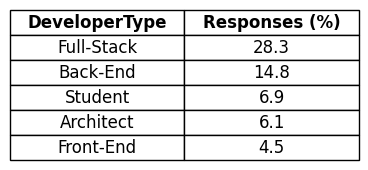

In [21]:
fig, ax = plt.subplots(figsize=(3,1))
ax.axis("off")

table = ax.table(cellText =result_mb.values, colLabels=result_mb.columns, cellLoc="center", loc="center")
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.5, 1.5)  # Adjust cell size

for (row, col), cell in table.get_celld().items():
    if row == 0:  # Header row
        cell.get_text().set_fontweight('bold')
        
plt.show()

In [22]:
# Query and clean Industry

In [ ]:
query_industry = """
    SELECT 
        industry, 
        round(count(responseid) * 100 / (select count(responseid) from data where industry != 'None' and industry != 'Other:'), 2) as 'Responses (%)'
    FROM data
    where 
        industry != 'None' 
        and industry != 'Other:'
    group by industry
    ORDER BY "Responses (%)" desc
"""

result_industry = con.sql(query_industry).df().head(10)
result_industry


,Industry,Responses (%)
0,Software Development,52.57
1,"Internet, Telecomm or Information Services",5.48
2,Fintech,5.45
3,Banking/Financial Services,4.63
4,Healthcare,4.51
5,Manufacturing,4.25
6,Government,3.82
7,Higher Education,3.77
8,Retail and Consumer Services,3.40
9,"Transportation, or Supply Chain",2.94


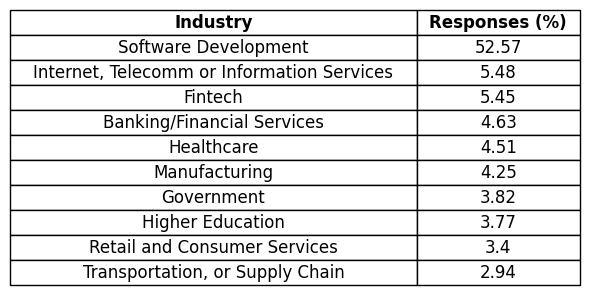

In [24]:
fig, ax = plt.subplots(figsize=(7,1))
ax.axis("off")

column_widths = [0.5, 0.2]
table = ax.table(cellText =result_industry.values, colLabels=result_industry.columns, cellLoc="center", loc="center", colWidths=column_widths)
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.5, 1.5)  # Adjust cell size

for (row, col), cell in table.get_celld().items():
    if row == 0:  # Header row
        cell.get_text().set_fontweight('bold')
        
plt.show()

In [25]:
result_industry_asc = result_industry.sort_values(by='Responses (%)', ascending=True) 
x2 = result_industry_asc['Industry']
y2 = result_industry_asc['Responses (%)']

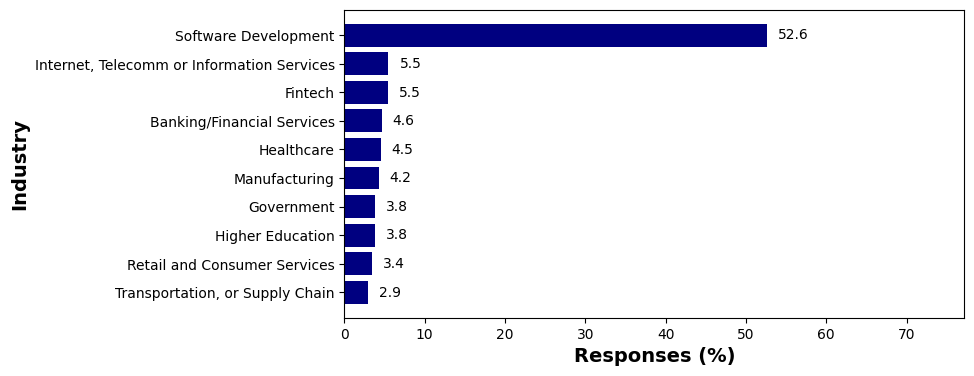

In [26]:
fig2, ax2 = plt.subplots(figsize=(8,4))

bars2 = plt.barh(x2, y2, color = 'navy')

ax2.bar_label(bars2, padding = 8, fmt='%.1f')

ax2.set_xlabel('Responses (%)', fontsize = 14, fontweight = 'bold')
ax2.set_ylabel('Industry', fontsize = 14, fontweight = 'bold')

ax2.set_xlim(right= sorted_branch['Responses (%)'].max())

plt.show()

In [ ]:
queryAI = """
    select 
        REPLACE(REPLACE(Age, ' years old', ''), '65 years or older', '>=65') AS Age,
        Workexp as 'YrsOfExp',

            CASE 
                WHEN workexp between 1 and 3 then 'Junior Developer'
                when workexp between 3 and 6 then 'Mid-Level Developer'
                when workexp between 6 and 10 then 'Senior Developer'
                when workexp between 10 and 15 then 'Staff/Lead Developer'
                when workexp between 15 and 20 then 'Principal'
                when workexp between 20 and 30 then 'Distinguished Engineer/Fellow'
                when workexp between 30 and 60 then 'Veteran/Executive'
                else 'Not Valid'
            END AS 'Level',

            CASE
                WHEN LOWER(aiselect) LIKE '%every day%' 
                    OR LOWER(aiselect) LIKE '%daily%' THEN 'Daily'
                WHEN LOWER(aiselect) LIKE '%week%' THEN 'Weekly'
                WHEN LOWER(aiselect) LIKE '%month%' THEN 'Monthly'
                WHEN LOWER(aiselect) LIKE '%plan to soon%' THEN 'I plan to use AI soon'
                WHEN LOWER(aiselect) LIKE '%don''t plan%' 
                    OR LOWER(aiselect) LIKE '%never%' THEN 'I don''t plan to use AI'
                ELSE aiselect
            END AS AISelect, 

            replace(replace(aicomplex, 
            ' at handling complex tasks', ''), 
            'I don''t use AI tools for complex tasks / I don''t know' , 
            'I don''t use AI for complex tasks') as AIComplex, 
            
            aiacc, 
            
            aisent
    from data
    where aiselect is not null
    and aicomplex is not null
    and aiacc is not null
    and aisent is not null
    and Age != 'Prefer not to say'
    and workexp <= 60
"""
resultAI = con.sql(queryAI).df()
resultAI.to_csv('AI_use_by_age_exp.csv')
resultAI

,Age,YrsOfExp,Level,AISelect,AIComplex,AIAcc,AISent
0,25-34,8.0,Senior Developer,Monthly,Bad,Neither trust nor distrust,Indifferent
1,25-34,2.0,Junior Developer,Weekly,Bad,Neither trust nor distrust,Indifferent
2,35-44,10.0,Senior Developer,Daily,Neither good or bad,Somewhat trust,Favorable
3,35-44,4.0,Mid-Level Developer,Weekly,Bad,Somewhat trust,Favorable
4,35-44,21.0,Distinguished Engineer/Fellow,Weekly,"Good, but not great",Neither trust nor distrust,Favorable
...,...,...,...,...,...,...,...
30477,18-24,1.0,Junior Developer,Monthly,Neither good or bad,Somewhat trust,Favorable
30478,45-54,8.0,Senior Developer,Daily,Very well,Highly trust,Very favorable
30479,25-34,2.0,Junior Developer,Weekly,"Good, but not great",Somewhat distrust,Favorable
30480,45-54,29.0,Distinguished Engineer/Fellow,Daily,Neither good or bad,Somewhat distrust,Very favorable


In [28]:
order = ["Daily", "Weekly", "Monthly", "I plan to use AI soon", "I don't plan to use AI"]
order2 = ["Very well", "Good, but not great", "Neither good or bad", "Bad", "Very poor", "I don't use AI for complex tasks"]
order3 = [">=65", "55-64", "45-54", "35-44", "25-34", "18-24"]
order4 = ["Highly trust", "Somewhat trust", "Neither trust nor distrust", "Somewhat distrust", "Highly distrust"]
order5 = ["Veteran/Executive", "Distinguished Engineer/Fellow", "Principal", "Staff/Lead Developer", "Senior Developer", "Mid-Level Developer", "Junior Developer"]


In [29]:
resultAI.to_csv("ai_use.csv")

In [30]:
# Hypothesis 1: There is no relationship between the age range (Age) of devs 
# and the frequency of AI usage (AISelect).

In [31]:
contigency = pd.crosstab(resultAI['Age'], resultAI['AISelect']).reindex(index=order3, columns=order)
display(contigency)

AISelect,Daily,Weekly,Monthly,I plan to use AI soon,I don't plan to use AI
Age,,,,,
>=65,159,84,120,103,259
55-64,700,317,318,243,474
45-54,2087,819,672,334,701
35-44,4503,1634,1264,463,1343
25-34,5334,1862,1323,384,1463
18-24,1815,679,430,66,529


In [32]:
from scipy.stats import chi2_contingency

In [33]:
chi2, p, dof, expected = chi2_contingency(contigency)

print("Chi-square Statistic:", chi2)
print("Degrees of Freedom:", dof)
print("P-value:", p)
print("Expected Frequencies:\n", expected)

Chi-square Statistic: 1005.009762989566
Degrees of Freedom: 20
P-value: 3.336070491953181e-200
Expected Frequencies:
 [[ 347.20654813  128.31753166   98.15874943   37.88875402  113.42841677]
 [ 982.71425759  363.18286202  277.82310872  107.23823896  321.04153271]
 [2209.19145725  816.45348074  624.56042911  241.07699626  721.71763664]
 [4409.28370842 1629.54415721 1246.54842202  481.16104586 1440.46266649]
 [4964.33527984 1834.67521816 1403.46702972  541.73079194 1621.79168034]
 [1685.26874877  622.82675021  476.44226101  183.90417295  550.55806706]]


In [34]:
# The null hypothesis is rejected in this case (p-value < 0.05). 
# There is clearly a relationship between developers' age and the frequency that they use AI for daily tasks.

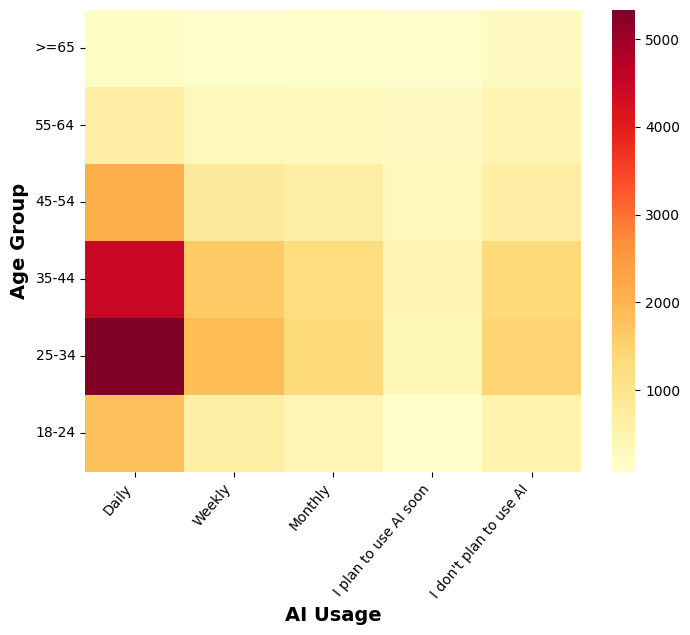

In [35]:
plt.figure(figsize=(8, 6))
sns.heatmap(contigency, annot=False, fmt="d", cmap="YlOrRd")

# plt.title("Frequency of AI Usage by Age Group", fontsize = 18, fontweight = 'bold')
plt.ylabel("Age Group", fontsize = 14, fontweight = 'bold')
plt.xlabel("AI Usage", fontsize = 14, fontweight = 'bold')

plt.xticks(rotation=50, ha="right")   # rotate x-axis labels
plt.yticks(rotation= 360)

plt.show()

In [36]:
#Hypothesis 2: There is no association between 
# the frequency of AI usage (AISelect) and 
# the complexity of AI in handling complex tasks (AIComplex) that devs find.

In [50]:
contigency2 = pd.crosstab(resultAI['AIComplex'], resultAI['AISelect']).reindex(index=order2, columns=order)
display(contigency2)

AISelect,Daily,Weekly,Monthly,I plan to use AI soon,I don't plan to use AI
AIComplex,,,,,
Very well,1058,99,64,29,13
"Good, but not great",5554,1327,549,205,65
Neither good or bad,2424,943,606,223,144
Bad,3451,1651,1157,229,339
Very poor,1759,1047,1212,172,1149
I don't use AI for complex tasks,352,328,539,735,3059


In [51]:
chi2, p, dof, expected = chi2_contingency(contigency2)

print("Chi-square Statistic:", chi2)
print("Degrees of Freedom:", dof)
print("P-value:", p)
print("Expected Frequencies:\n", expected)

Chi-square Statistic: 14647.891689582828
Degrees of Freedom: 20
P-value: 0.0
Expected Frequencies:
 [[ 604.85775212  223.53798963  170.99931107   66.00482252  197.60012466]
 [3687.5729939  1362.82068106 1042.51361459  402.40469785 1204.6880126 ]
 [2078.45023292  768.13529296  587.59858277  226.80992061  679.00597074]
 [3269.4884194  1208.30867397  924.31694115  356.78141198 1068.10455351]
 [2556.87691096  944.9480021   722.85456991  279.01801063  835.3025064 ]
 [2400.7536907   887.24936028  678.71698051  261.98113641  784.2988321 ]]


In [40]:
# Hypothesis 3: There is no association between the age range (Age) and 
# the degree to which developers trust AI (AIAcc).

In [41]:
contigency3 = pd.crosstab(resultAI['Age'], resultAI['AIAcc']).reindex(index=order3, columns=order4)
display(contigency3)

AIAcc,Highly trust,Somewhat trust,Neither trust nor distrust,Somewhat distrust,Highly distrust
Age,,,,,
>=65,23,182,184,180,156
55-64,53,587,443,562,407
45-54,128,1369,1053,1224,839
35-44,273,2758,1996,2373,1807
25-34,323,3168,2152,2707,2016
18-24,106,1012,778,922,701


In [42]:
chi2, p, dof, expected = chi2_contingency(contigency3)

print("Chi-square Statistic:", chi2)
print("Degrees of Freedom:", dof)
print("P-value:", p)
print("Expected Frequencies:\n", expected)

Chi-square Statistic: 32.49665059129989
Degrees of Freedom: 20
P-value: 0.038285326821951425
Expected Frequencies:
 [[  21.54878289  215.86838134  157.12059576  189.51512368  140.94711633]
 [  60.99048619  610.98195656  444.70546552  536.39315006  398.92894167]
 [ 137.10970409 1373.5184043   999.72042517 1205.83898694  896.8124795 ]
 [ 273.65468145 2741.37956827 1995.32320714 2406.71137064 1789.9311725 ]
 [ 308.10301161 3086.47122892 2246.49944229 2709.67416836 2015.25214881]
 [ 104.59333377 1047.7804606   762.63086412  919.86720031  684.1281412 ]]


In [43]:
# # Hypothesis 3: There is no association between the age range (Age) and 
# the degree to which developers trust AI (AIAcc).

# Here we rejects the null hypethesis that there is no
# association between the devs' age range (Age) and how much they trust AI (AIAcc).
# As the p-value < 0.05 (p-value = 0.043), there is clearly a relationship between
# how old developers are and how much do they trust in artificial intelligence.

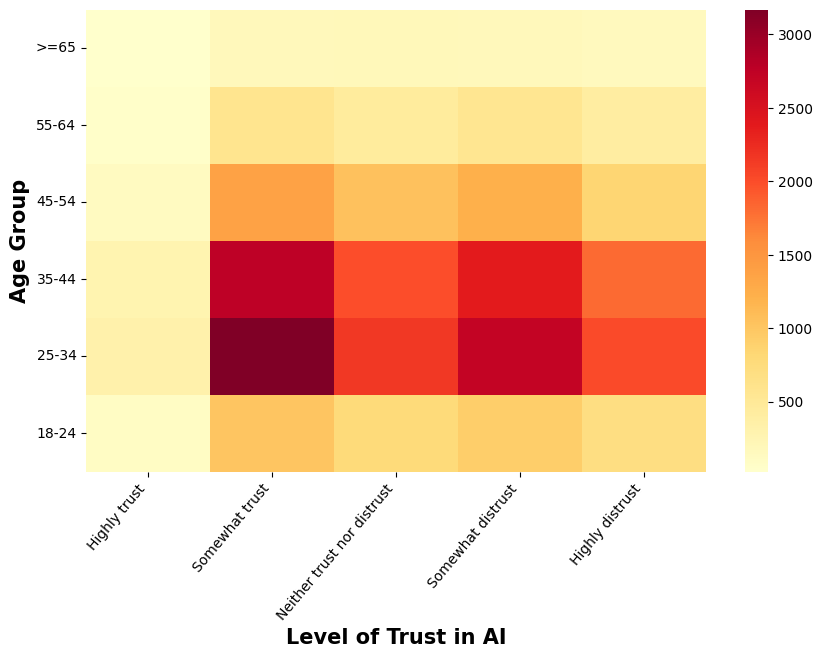

In [55]:
# Developers' AI Credibility by Age Group
plt.subplots(figsize=(10,6))
sns.heatmap(contigency3,annot=False, fmt="d", cmap="YlOrRd")

plt.xlabel("Level of Trust in AI", fontsize = 15, fontweight = 'bold')
plt.ylabel("Age Group", fontsize = 15, fontweight = 'bold')

plt.xticks(rotation=50, ha="right")   # rotate x-axis labels
plt.yticks(rotation=0)

plt.show()

In [45]:
# Hypothesis 4: There is no relationship between devs' 
# years of experience (YrsOfExp) and the degree of complexity 
# that devs think AI can handle (AIComplex).

In [46]:
contigency4 = pd.crosstab(resultAI['Level'], resultAI['AIComplex']).reindex(index=order5, columns=order2)
display(contigency4)

AIComplex,Very well,"Good, but not great",Neither good or bad,Bad,Very poor,I don't use AI for complex tasks
Level,,,,,,
Veteran/Executive,103,509,320,397,263,714
Distinguished Engineer/Fellow,170,1116,725,1047,789,905
Principal,141,918,560,821,673,604
Staff/Lead Developer,195,1261,773,1149,933,817
Senior Developer,242,1405,751,1320,1018,750
Mid-Level Developer,206,1204,607,976,805,589
Junior Developer,206,1287,604,1117,858,634


In [59]:
chi2, p, dof, expected = chi2_contingency(contigency4)

print("Chi-square Statistic:", chi2)
print("Degrees of Freedom:", dof)
print("P-value:", p)
print("Expected Frequencies:\n", expected)

Chi-square Statistic: 550.9172759586578
Degrees of Freedom: 30
P-value: 4.0999626267160307e-97
Expected Frequencies:
 [[  95.54747064  582.51427072  328.32622531  516.47076963  403.9017781
   379.2394856 ]
 [ 196.89574175 1200.39367496  676.58552588 1064.29709337  832.32491306
   781.50305098]
 [ 154.01125254  938.94429499  529.22314809  832.48996129  651.0420248
   611.28931829]
 [ 212.47503445 1295.37431927  730.12007086 1148.50915294  898.1822715
   843.33915097]
 [ 227.30850994 1385.80801785  781.09179188 1228.68978413  960.88688406
   902.21501214]
 [ 181.77222623 1108.1917197   624.61715111  982.54868447  768.39423266
   721.47598583]
 [ 194.98976445 1188.77370251  670.03608687 1053.99455416  824.26789581
   773.93799619]]


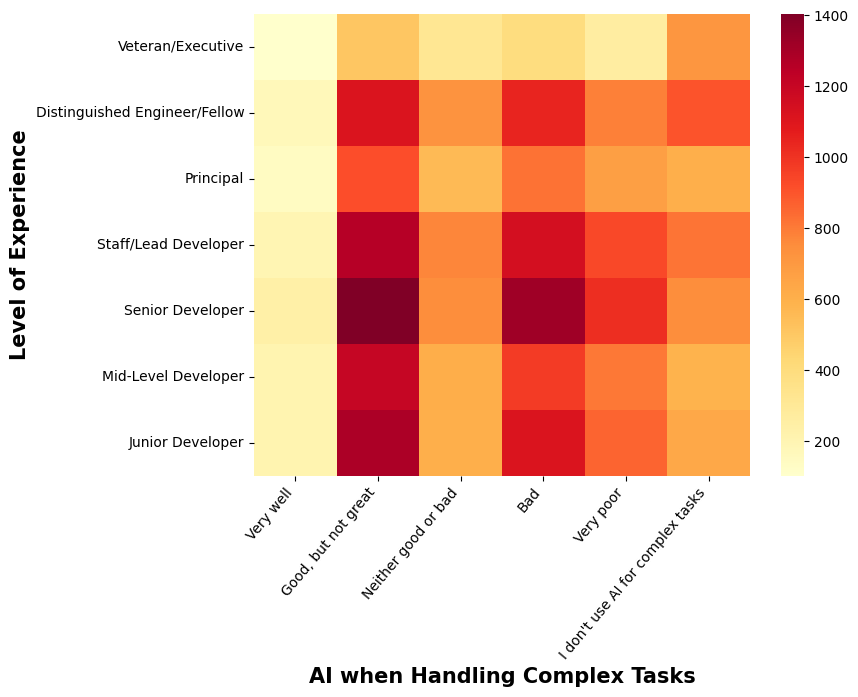

In [58]:
plt.subplots(figsize=(8,6))
sns.heatmap(contigency4,annot=False, fmt="d", cmap="YlOrRd")

plt.xlabel("AI when Handling Complex Tasks", fontsize = 15, fontweight = 'bold')
plt.ylabel("Level of Experience", fontsize = 15, fontweight = 'bold')

plt.xticks(rotation=50, ha="right")   # rotate x-axis labels
plt.yticks(rotation=0)

plt.show()